# Problem Set 6 - Economics 411 - November 6 2019
## Thomas Pellet, Anastasiia Evdokimova and Jose Diego Salas
## Perturbation over the Nash equilibrium
### e)

In [256]:
import numpy as np
import scipy.optimize as opt
from matplotlib import pyplot as plt
N=100
L = np.linspace(0.01,1,N)
α = 0.8

# Best response function
def G(Lp,L, η):
    return (1-α)/((1-α)*Lp + α*L) - np.power(Lp,η)

#solve
def solve_ss(L, η):
    solution = np.zeros_like(L)
    for i in range(N):
        solve_me = lambda x: G(x, L[i], float(η))
        sol = opt.root(solve_me, .4)
        solution[i] = sol.x
    
    return solution

In [257]:
solution_loweta = solve_ss(L, 1)
solution_higheta = solve_ss(L, 5)
#Nash equilibrium for eta equals 1
print((1-α)**(1/(1+1)))

0.44721359549995787


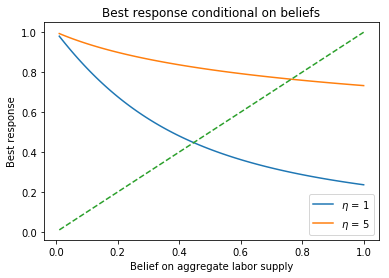

In [258]:
# Plotting best response
plt.plot(L,solution_loweta)
plt.plot(L,solution_higheta)
plt.plot(L,L,'--')
plt.legend([r'$\eta$ = 1', r'$\eta$ = 5'])
plt.title("Best response conditional on beliefs")
plt.xlabel("Belief on aggregate labor supply")
plt.ylabel("Best response")
plt.show()

The best response is very well behaved, which suggests that the perturbation approximation should be very good globally. 

In [259]:
def solve_point(L, η):
    solve_me = lambda x: G(x, L, η)
    sol = opt.root(solve_me, .4)
    return sol.x
    
# First order approximation
def first_order_l(L, eps, η):

    Nash = (1-α)**(1/(η+1))
    
    lminus = solve_point(Nash-eps, η)
    lplus = solve_point(Nash+eps, η)
    
    # Central difference
    xu = (lplus - lminus)/(2 * eps)
    approx_l = Nash + xu * (L - Nash)

    return approx_l

# second order approximation
def second_order_l(L, eps, η):

    Nash = (1-α)**(1/(η+1))
    
    lminus = solve_point(Nash-eps, η)
    lplus = solve_point(Nash+eps, η)
    
    # Central difference
    xu = (lplus - lminus)/(2 * eps)
        
    xuu = (lplus - 2 * Nash + lminus) / (eps ** 2)
     
    approx_l = Nash + xu * (L - Nash) + 0.5 * xuu * (L - Nash) ** 2

    return approx_l

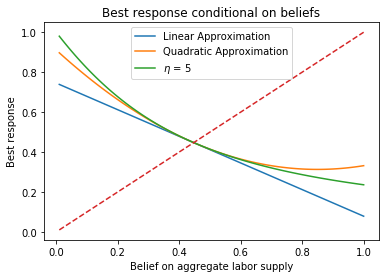

In [260]:
# Plotting the perturbation approximation
plt.plot(L,first_order_l(L, 0.01, 1))
plt.plot(L,second_order_l(L, 0.01, 1))
plt.plot(L,solve_ss(L, 1))
plt.plot(L,L,'--')
plt.legend(['Linear Approximation', 'Quadratic Approximation', r'$\eta$ = 5'])
plt.title("Best response conditional on beliefs")
plt.xlabel("Belief on aggregate labor supply")
plt.ylabel("Best response")
plt.show()

In a local neighborhood around the nash equilibrium, the approximation is good.

### f)
To determine the conditions under which the Nash equilibrium is the unique rationalizable equilibrium, we need to determine under which conditions is the inverse of the best response unstable.

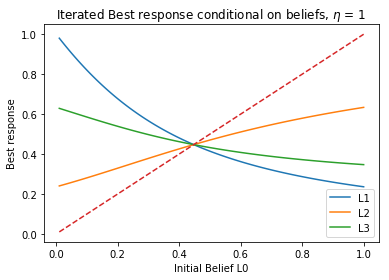

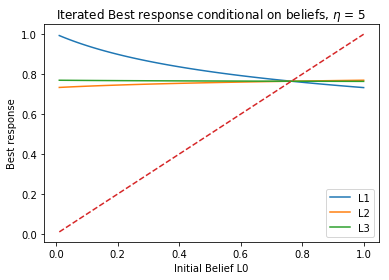

In [261]:
# Interpolation function
def interpol(x,L,Lp):
    return np.interp(x, L, Lp)

def iterate(solution, L):
    L2p = np.zeros_like(L)
    for i in range(N):
        L2p[i] = interpol(solution[i],L, solution)
    return L2p

def iterate2(solution, L, L2p):
    L3 = np.zeros_like(L)
    for i in range(N):
        L3[i] = interpol(L2p[i],L, solution)
    return L3

def plotting(L, η):
    solution = solve_ss(L, η)
    L2p = np.zeros_like(L)
    L3p = np.zeros_like(L)
    L2p = iterate(solution, L)
    L3p = iterate2(solution, L, L2p)
    plt.plot(L,solution)
    plt.plot(L,L2p)
    plt.plot(L,L3p)
    plt.plot(L,L,'--')
    plt.legend(['L1', 'L2', 'L3'])
    plt.title(r'Iterated Best response conditional on beliefs, $\eta$ = {j}'.format(j=η))
    plt.xlabel("Initial Belief L0")
    plt.ylabel("Best response")
    plt.show()


plotting(L, 1)
plotting(L, 5)


With bigger $\eta$, the best response is flatter, everything else equal. This suggests that for $\eta$ large enough, iterated deletion seems to converge to the Nash equilibrium. Nash is therefore the only rationalizable belief. To solve explicitly for the lowest $\eta$ such that Nash is the only rational belief, we need to solve for $f'(\eta) = -1$

In [262]:
#Solving numerically for the case with non-Nash rationalizable beliefs
# First order approximation
def fprime(L, eps, η):

    Nash = (1-α)**(1/(η+1))
    
    lminus = solve_point(Nash-eps, η)
    lplus = solve_point(Nash+eps, η)
    
    # Central difference
    xu = (lplus - lminus)/(2 * eps)

    return xu + 1

def solve_fprime(L):
        solve_me = lambda x: fprime(L, 0.01, x)
        sol = opt.root(solve_me, .4)
        return sol.x
    
print(solve_fprime(L))

[0.60011961]


In [265]:
# Given \alpha = 0.8, the derivative of the best response function is -1 for \eta = 0.6. 
# Since the derivative of f decreases in absolute value with \eta, the derivative of f^{-1} is increasing in \eta 
# so that f inverse is unstable for  \eta \geq 0.6.  
# Hence The Nash Equilibrium is the unique rationalizable belief for \eta \geq 0.6. 
# Here \alpha \geq 0.5 so the range of possible \alpha compatible with a unique rationalizable belief increases 
# with larger \eta.

## g)

In [263]:
# Best response function
def G(Lp,L):
    return -(1-α)/((1-α)*Lp + α*L) + np.sign(Lp) * (np.abs(Lp)) ** (1 / 3)

#solve
def solve_ss(L):
    solution = np.zeros_like(L)
    for i in range(N):
        solve_me = lambda x: G(x, L[i])
        sol = opt.root(solve_me, 1)
        solution[i] = sol.x
    
    return solution



sol_01 = solve_ss(L)

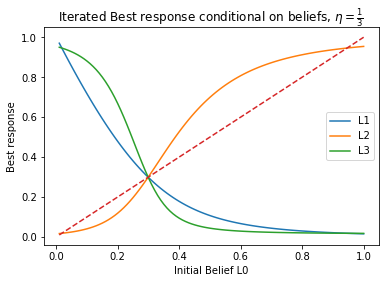

In [264]:

L2p = np.zeros_like(L)
L3p = np.zeros_like(L)
L2p = iterate(sol_01, L)
L3p = iterate2(sol_01, L, L2p)
plt.plot(L,sol_01)
plt.plot(L,L2p)
plt.plot(L,L3p)
plt.plot(L,L,'--')
plt.legend(['L1', 'L2', 'L3'])
plt.title(r'Iterated Best response conditional on beliefs, $\eta = \frac{1}{3}$')
plt.xlabel("Initial Belief L0")
plt.ylabel("Best response")
plt.show()

One can see that iterated deletion does not rule out any belief in this case. The whole range from 0 to 1 is rationalizable.